# Model Development - TF-IDF 

- Extraction des features du dataset avec la méthode TF-IDF


1. Importation du dataset
2. Chargement des librairies
3. Création des pipelines pour les modèles de classification
4. Création de trainig set et du test set
5. Entrainement des modèles de classification
6. Predictions
7. Résultats
8. Conclusion

### 1. Importation du dataset

In [276]:
## for data manipulation
import numpy as np
import pandas as pd

## import the dataset
df=pd.read_csv("data_cleaning.csv")
df.head()

,Label,final
0,cricket,"['kumbl', 'break', 'kapil', 'record', 'first',..."
1,cricket,"['aussi', 'tighten', 'grip', 'first', 'test', ..."
2,cricket,"['vaughan', 'readi', 'south', 'africa', 'skipp..."
3,cricket,"['world', 'xi', 'triumph', 'tsunami', 'match',..."
4,cricket,"['shoaib', 'rule', 'test', 'seri', 'fast', 'bo..."


In [277]:
## for the dataset shape
df.shape

(472, 2)

### 2. Chargement des librairies

In [278]:
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for bag-of-words and TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

## for metrics, pipeline, preprocessing
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import roc_curve

## for multinmial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

## KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

## Random Forest, AdaBoost Classifier, Gradient Boosting, Bagging Classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

### 3. Creation des pipelines pour les modèles de classification

In [279]:

## TF-IDF KNN Classifier pipeline setup
knn_pipe = Pipeline([
 ('tf_idf', TfidfVectorizer()),
 ('knn', KNeighborsClassifier())
])

## TF-IDF Gradient Boosting Classifier pipeline setup
gdb_pipe = Pipeline([
 ('tf_idf', TfidfVectorizer()),
 ('gdb', GradientBoostingClassifier())
])

## TF-IDF Decision Tree Classifier pipeline setup
tree_pipe = Pipeline([
 ('tf_idf', TfidfVectorizer()),
 ('tree', DecisionTreeClassifier())
])


## TF-IDF Multinomial Naïve Bayes pipeline setup
nb_pipe = Pipeline([
 ('tf_idf', TfidfVectorizer()),
 ('nb', MultinomialNB())
])

## TF-IDF Random Forest pipeline setup
rf_pipe = Pipeline([
 ('tf_idf', TfidfVectorizer()),
 ('rf', RandomForestClassifier())
])

## TF-IDF AdaBoost Classifier pipeline setup
ada_pipe = Pipeline([
 ('tf_idf', TfidfVectorizer()),
 ('ada', AdaBoostClassifier())
])

## TF-IDF Bagging Classifier pipeline setup
bag_pipe = Pipeline([
 ('tf_idf', TfidfVectorizer()),
 ('bag', AdaBoostClassifier())
])


### 4. Creation d'un training set et d'un test set

In [280]:
## Split the dataset 

y = df.drop("final", axis=1)
X = df.drop("Label", axis=1)

a_y = y.values.ravel()
a_X = X.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(a_X, a_y, test_size=.20, random_state=0) ##  train/test 80/20


### 5. Entraînement de modèles de classification

In [281]:
X_train, X_test, y_train, y_test = train_test_split(a_X, a_y, test_size=.20, random_state=0) ##  train/test 80/20

## Train the model
model_nb = nb_pipe.fit(X_train, y_train)
model_knn = knn_pipe.fit(X_train, y_train)
model_gdb = gdb_pipe.fit(X_train, y_train)
model_tree = tree_pipe.fit(X_train, y_train)
model_rf = rf_pipe.fit(X_train, y_train)
model_ada = ada_pipe.fit(X_train, y_train)
model_bag = bag_pipe.fit(X_train, y_train)

### 6. Predictions

In [282]:
#Prediction
pred_nb = model_nb.predict(X_test)
pred_knn = model_knn.predict(X_test)
pred_gdb = model_gdb.predict(X_test)
pred_tree = model_tree.predict(X_test)
pred_rf = model_rf.predict(X_test)
pred_ada = model_ada.predict(X_test)
pred_bag = model_bag.predict(X_test)

### 7. Resultats


### Naive Bayes Classifier

Naive Bayes Accuracy: 0.94
Detail:
              precision    recall  f1-score   support

   athletics       1.00      0.94      0.97        18
     cricket       1.00      0.90      0.95        20
       rugby       0.85      1.00      0.92        35
      tennis       1.00      0.86      0.93        22

    accuracy                           0.94        95
   macro avg       0.96      0.93      0.94        95
weighted avg       0.95      0.94      0.94        95



Text(24.0, 0.5, 'Réel')

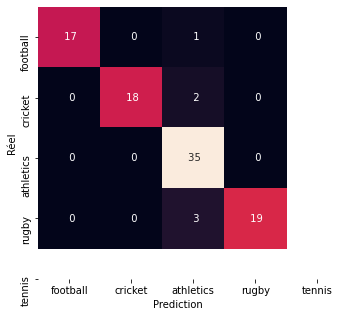

In [283]:
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, pred_nb)
print("Naive Bayes Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, pred_nb))

#Matrice de confusion
fig, ax = plt.subplots(figsize=(5,5)) 
categories = ['football', 'cricket', 'athletics', 'rugby', 'tennis']
cm = metrics.confusion_matrix(y_test, pred_nb)
ax = sns.heatmap(cm, annot=True, 
                 xticklabels=categories, 
                 yticklabels=categories,
                 fmt='3d', cbar=False) # cells are counts
ax.set_xlabel('Prediction')
ax.set_ylabel('Réel')

### KNN Classifier

KNN Classifier Accuracy: 0.96
Detail:
              precision    recall  f1-score   support

   athletics       0.89      0.94      0.92        18
     cricket       1.00      0.95      0.97        20
       rugby       0.94      0.97      0.96        35
      tennis       1.00      0.95      0.98        22

    accuracy                           0.96        95
   macro avg       0.96      0.96      0.96        95
weighted avg       0.96      0.96      0.96        95



Text(24.0, 0.5, 'Réel')

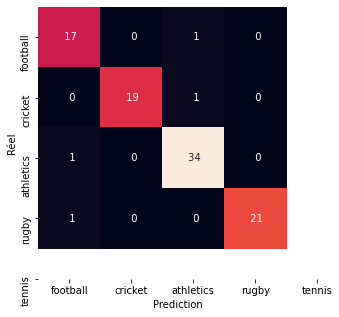

In [284]:
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, pred_knn)
print("KNN Classifier Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, pred_knn))

#Matrice de confusion
fig, ax = plt.subplots(figsize=(5,5)) 
categories = ['football', 'cricket', 'athletics', 'rugby', 'tennis']
cm = metrics.confusion_matrix(y_test, pred_knn)
ax = sns.heatmap(cm, annot=True, 
                 xticklabels=categories, 
                 yticklabels=categories,
                 fmt='3d', cbar=False) # cells are counts
ax.set_xlabel('Prediction')
ax.set_ylabel('Réel')

### Gradient Boosting Classifier

Gradient Boosting Classifier Accuracy: 0.95
Detail:
              precision    recall  f1-score   support

   athletics       0.82      1.00      0.90        18
     cricket       0.95      1.00      0.98        20
       rugby       1.00      0.94      0.97        35
      tennis       1.00      0.86      0.93        22

    accuracy                           0.95        95
   macro avg       0.94      0.95      0.94        95
weighted avg       0.96      0.95      0.95        95



Text(24.0, 0.5, 'Réel')

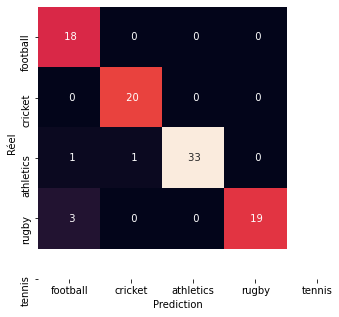

In [285]:
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, pred_gdb)
print("Gradient Boosting Classifier Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, pred_gdb))

#Matrice de confusion
fig, ax = plt.subplots(figsize=(5,5)) 
categories = ['football', 'cricket', 'athletics', 'rugby', 'tennis']
cm = metrics.confusion_matrix(y_test, pred_gdb)
ax = sns.heatmap(cm, annot=True, 
                 xticklabels=categories, 
                 yticklabels=categories,
                 fmt='3d', cbar=False) # cells are counts
ax.set_xlabel('Prediction')
ax.set_ylabel('Réel')

### Decision Tree Classifier

Decision Tree Classifier Accuracy: 0.91
Detail:
              precision    recall  f1-score   support

   athletics       0.77      0.94      0.85        18
     cricket       0.90      0.95      0.93        20
       rugby       0.94      0.94      0.94        35
      tennis       1.00      0.77      0.87        22

    accuracy                           0.91        95
   macro avg       0.91      0.90      0.90        95
weighted avg       0.92      0.91      0.91        95



Text(24.0, 0.5, 'Réel')

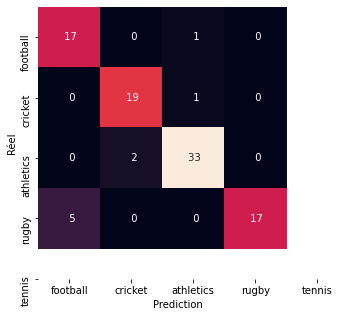

In [286]:
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, pred_tree)
print("Decision Tree Classifier Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, pred_tree))

#Matrice de confusion
fig, ax = plt.subplots(figsize=(5,5)) 
categories = ['football', 'cricket', 'athletics', 'rugby', 'tennis']
cm = metrics.confusion_matrix(y_test, pred_tree)
ax = sns.heatmap(cm, annot=True, 
                 xticklabels=categories, 
                 yticklabels=categories,
                 fmt='3d', cbar=False) # cells are counts
ax.set_xlabel('Prediction')
ax.set_ylabel('Réel')

### Random Forest Classifier

Random Forest Classifier Accuracy: 0.99
Detail:
              precision    recall  f1-score   support

   athletics       1.00      1.00      1.00        18
     cricket       1.00      1.00      1.00        20
       rugby       0.97      1.00      0.99        35
      tennis       1.00      0.95      0.98        22

    accuracy                           0.99        95
   macro avg       0.99      0.99      0.99        95
weighted avg       0.99      0.99      0.99        95



Text(24.0, 0.5, 'Réel')

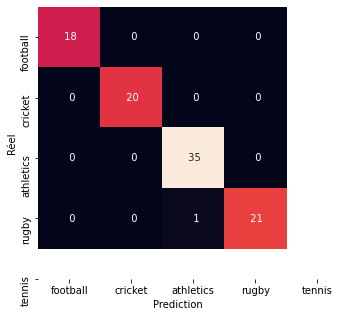

In [287]:
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, pred_rf)
print("Random Forest Classifier Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, pred_rf))

#Matrice de confusion
fig, ax = plt.subplots(figsize=(5,5)) 
categories = ['football', 'cricket', 'athletics', 'rugby', 'tennis']
cm = metrics.confusion_matrix(y_test, pred_rf)
ax = sns.heatmap(cm, annot=True, 
                 xticklabels=categories, 
                 yticklabels=categories,
                 fmt='3d', cbar=False) # cells are counts
ax.set_xlabel('Prediction')
ax.set_ylabel('Réel')

### AdaBoost Classifier

AdaBoost Classifier Accuracy: 0.84
Detail:
              precision    recall  f1-score   support

   athletics       0.75      1.00      0.86        18
     cricket       0.90      0.95      0.93        20
       rugby       0.93      0.77      0.84        35
      tennis       0.76      0.73      0.74        22

    accuracy                           0.84        95
   macro avg       0.84      0.86      0.84        95
weighted avg       0.85      0.84      0.84        95



Text(24.0, 0.5, 'Réel')

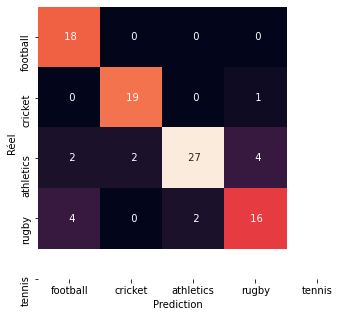

In [288]:
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, pred_ada)
print("AdaBoost Classifier Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, pred_ada))

#Matrice de confusion
fig, ax = plt.subplots(figsize=(5,5)) 
categories = ['football', 'cricket', 'athletics', 'rugby', 'tennis']
cm = metrics.confusion_matrix(y_test, pred_ada)
ax = sns.heatmap(cm, annot=True, 
                 xticklabels=categories, 
                 yticklabels=categories,
                 fmt='3d', cbar=False) # cells are counts
ax.set_xlabel('Prediction')
ax.set_ylabel('Réel')

### Bagging Classifier

Bagging Classifier Accuracy: 0.84
Detail:
              precision    recall  f1-score   support

   athletics       0.75      1.00      0.86        18
     cricket       0.90      0.95      0.93        20
       rugby       0.93      0.77      0.84        35
      tennis       0.76      0.73      0.74        22

    accuracy                           0.84        95
   macro avg       0.84      0.86      0.84        95
weighted avg       0.85      0.84      0.84        95



Text(24.0, 0.5, 'Réel')

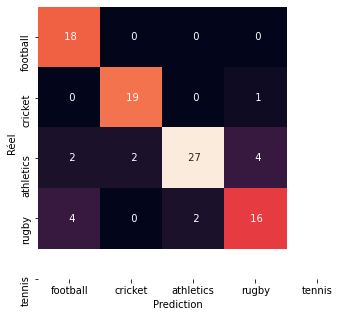

In [289]:
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, pred_bag)
print("Bagging Classifier Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, pred_bag))

#Matrice de confusion
fig, ax = plt.subplots(figsize=(5,5)) 
categories = ['football', 'cricket', 'athletics', 'rugby', 'tennis']
cm = metrics.confusion_matrix(y_test, pred_bag)
ax = sns.heatmap(cm, annot=True, 
                 xticklabels=categories, 
                 yticklabels=categories,
                 fmt='3d', cbar=False) # cells are counts
ax.set_xlabel('Prediction')
ax.set_ylabel('Réel')

### 8. Conclusion

- Si nous prenons en compte uniquement la métrique f1-score, c'est le modèle basée sur l'algorithme Random Forest qui detient le meilleur score de 97% avec la méthode d'extraction de feature Bag Of Words.
